In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import ternary
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from cmcrameri import cm
import ScientificColourMaps8 as SCM8
from scipy.stats import norm
from scipy.interpolate import interp1d
from scipy.stats import binom
from math import pi
import random
from random import randint
import warnings
warnings.filterwarnings('ignore')

In [2]:
from Ti_dynamo_code import *

# Figure S1

The following code generates Ti-rich diapirs with a mean radius of 40 km and a standard deviation of 1, 10, 20 and 40.  The distribution is one-tailed so that the maximum diapir radius cannot exceed 40 km.  Both histograms and cumulative distributions of the resulting diapir distribution are shown in the figure.

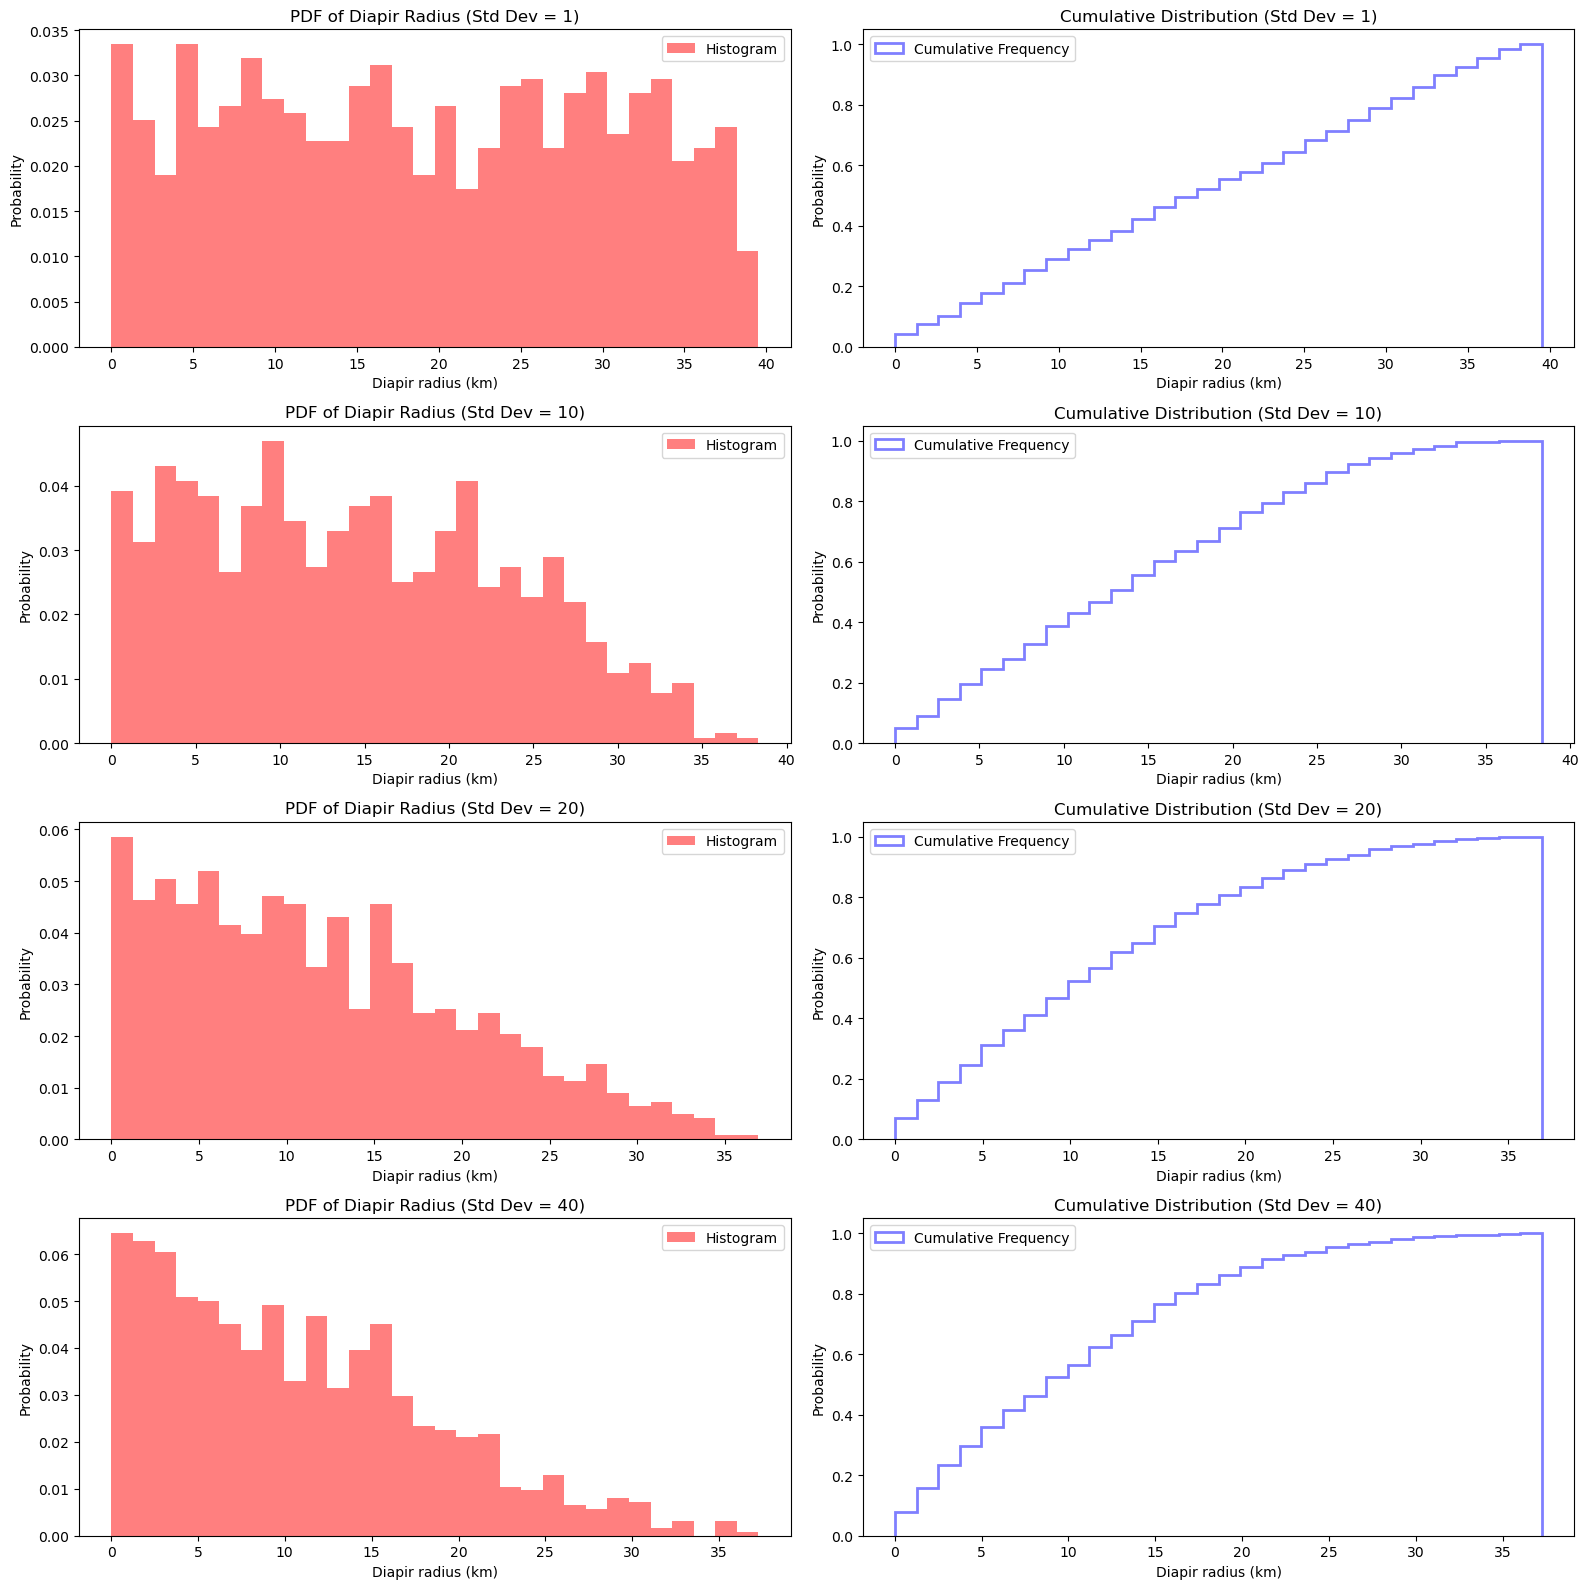

In [3]:
# Standard deviation values to use
std_devs = [1, 10, 20, 40]

# Create a 4x2 figure (8 subplots in total)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 16))

for i, std_dev in enumerate(std_devs):
    # Generate CDF for the given std deviation
    d = Diapir(10,std_dev)
    x, cdf = d.diapir_size()

    # Randomly sample from the distribution
    num_samples = 1000
    x_samples = np.random.uniform(0, 1, num_samples)
    interp_cdf = interp1d(cdf, x)
    sampled_diapir_size = interp_cdf(x_samples)

    # Plot the histogram of sampled diapir sizes on the left panel of the current row
    ax1 = axes[i, 0]
    ax1.hist(sampled_diapir_size, bins=30, color='red', alpha=0.5, density=True, label='Histogram')
    ax1.set_xlabel('Diapir radius (km)')
    ax1.set_ylabel('Probability')
    ax1.set_title(f'PDF of Diapir Radius (Std Dev = {std_dev})')
    ax1.legend()

    # Plot the cumulative frequency on the right panel of the current row
    ax2 = axes[i, 1]
    ax2.hist(sampled_diapir_size, bins=30, cumulative=True, color='blue', alpha=0.5, density=True, histtype='step', linewidth=2, label='Cumulative Frequency')
    ax2.set_xlabel('Diapir radius (km)')
    ax2.set_ylabel('Probability')
    ax2.set_title(f'Cumulative Distribution (Std Dev = {std_dev})')
    ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()

# Figure S2 

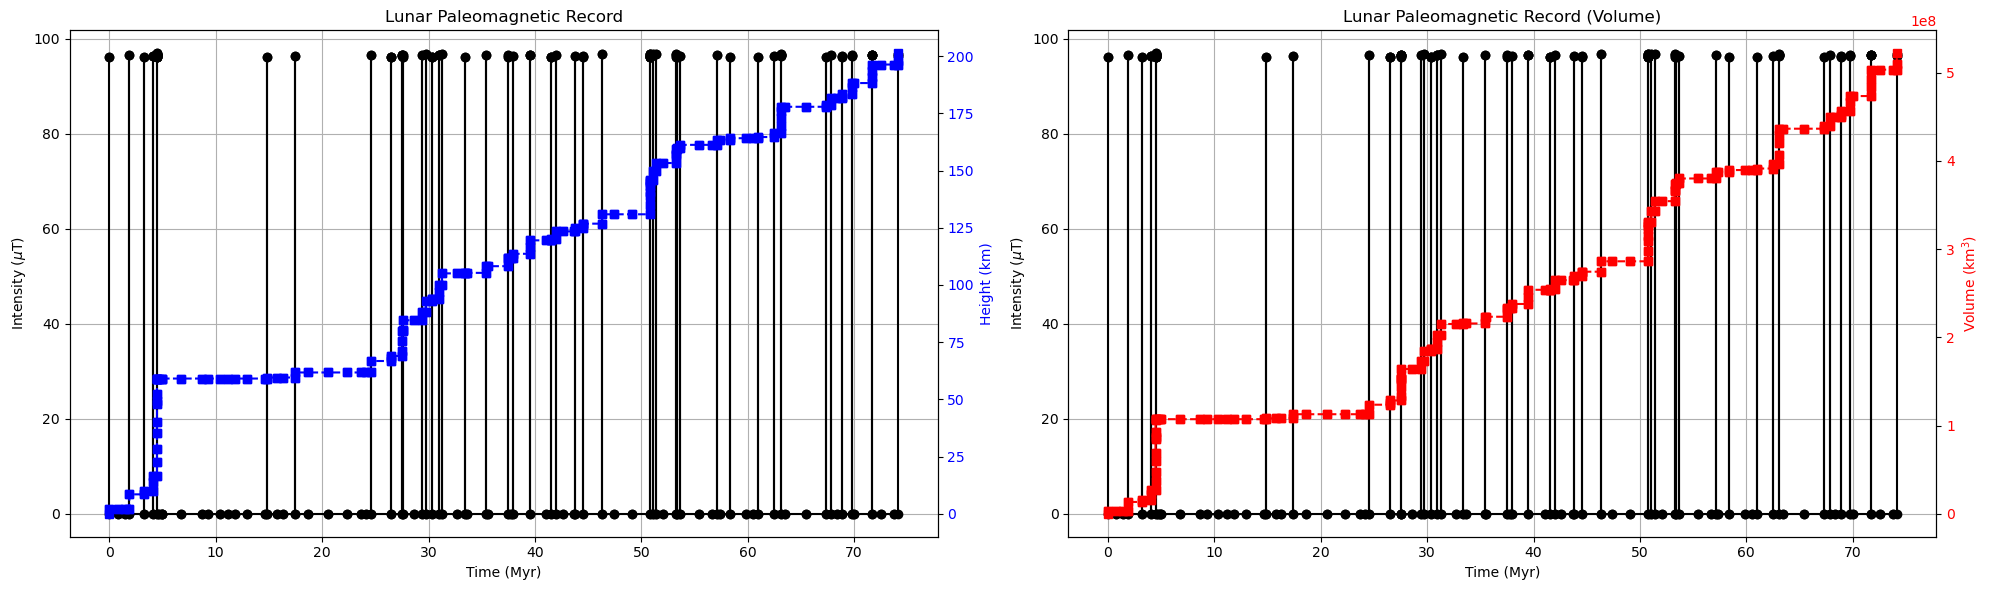

In [4]:
dynamo = DynamoGenerate(1000, 1000, 2000, 'height',constant = 0.001)
dynamo.plot_int_vs_time()

# Figure S3

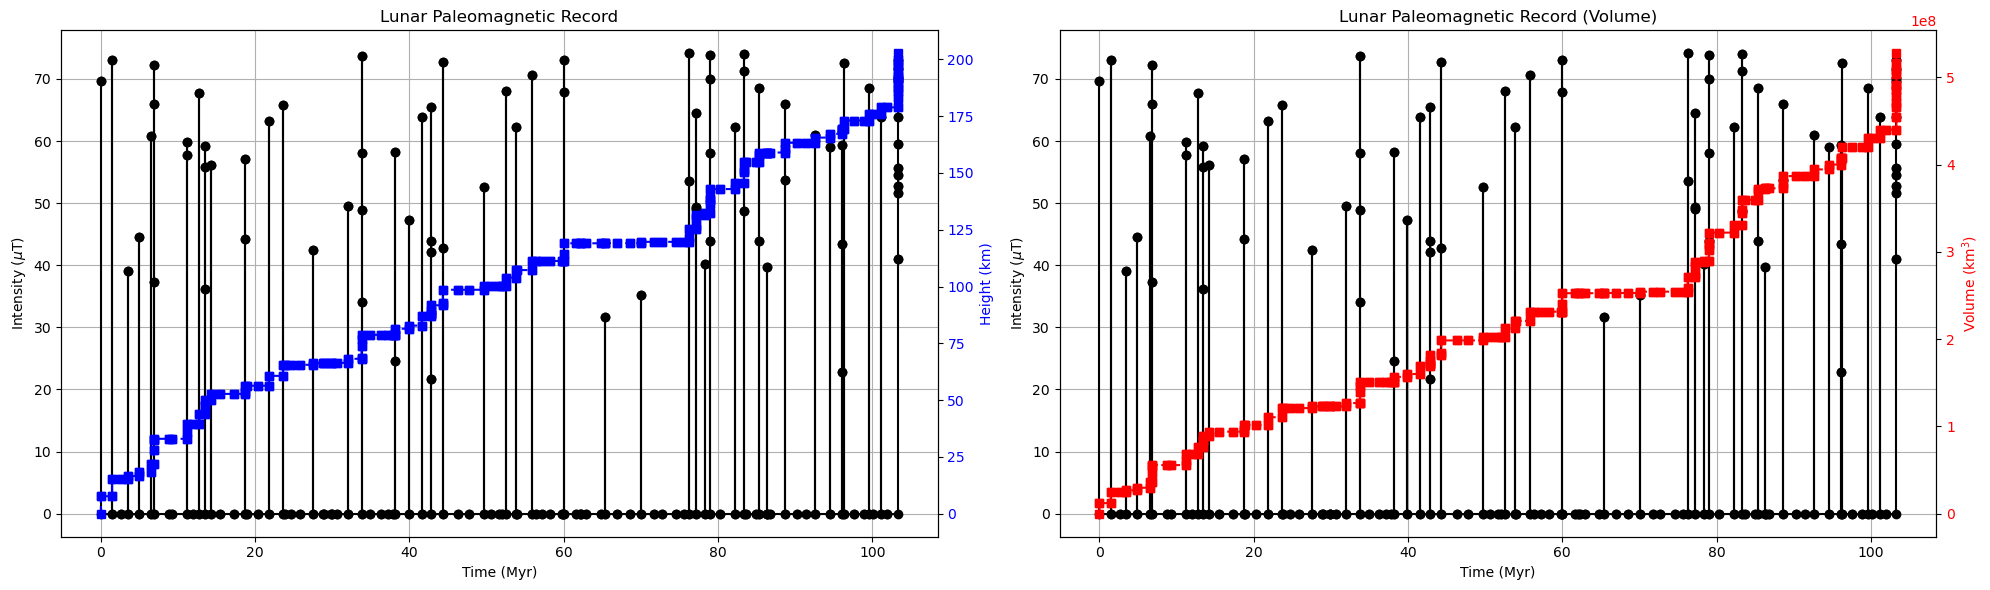

In [5]:
dynamo = DynamoGenerate(1000, 1000, 2000, 'volume',constant = 1e-7)
dynamo.plot_int_vs_time(save = "volume_simulated_dynamo_record")

# Figure S4

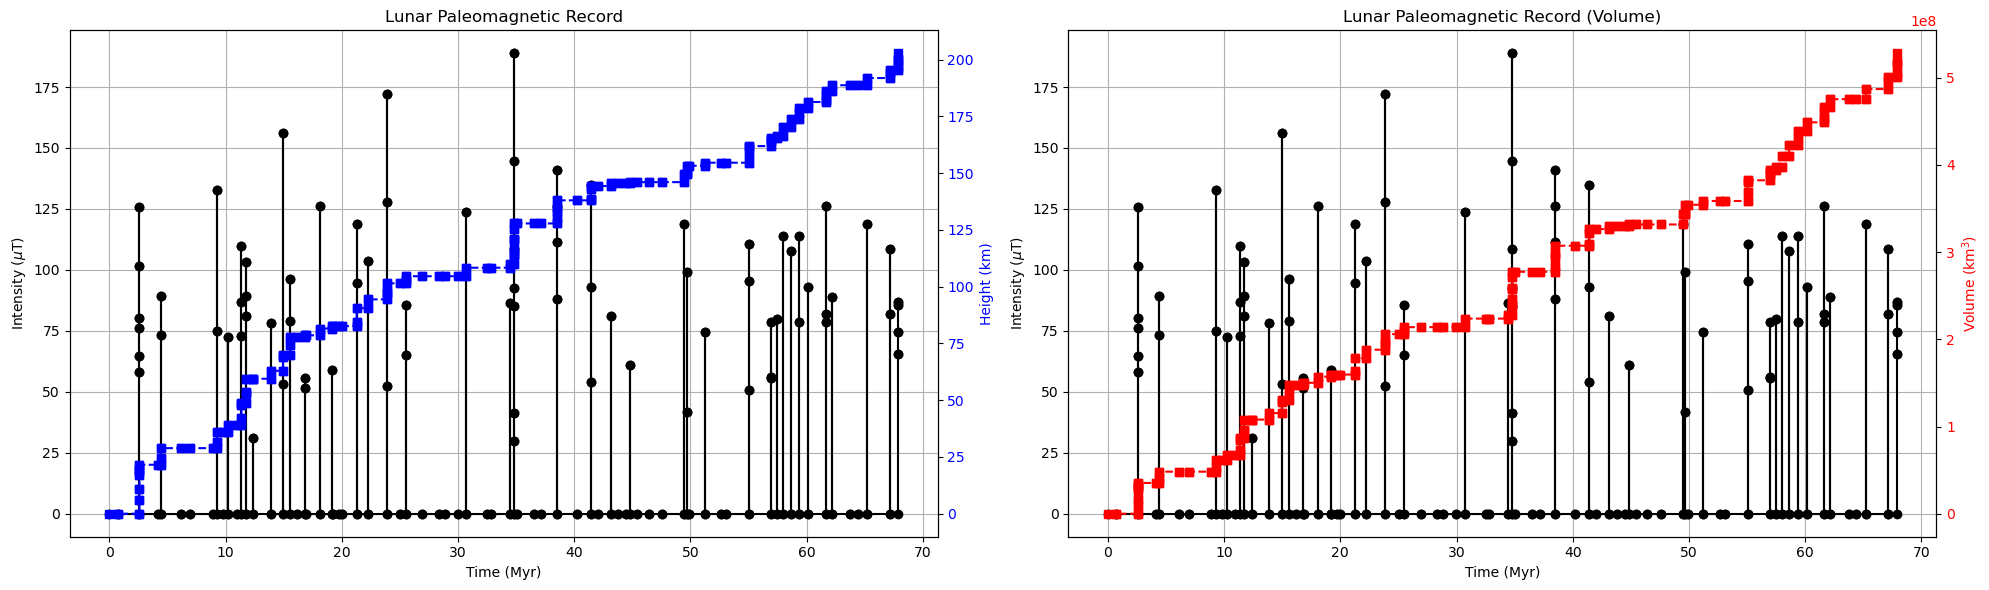

In [6]:
dynamo = DynamoGenerate(1000, 1000, 2000, 'independent',tOn = 0.001)
dynamo.plot_int_vs_time()

# Figure S5

Load in the pre-calculated data for each melting scenario

In [7]:
# Load the data
#Melting Scenario 1
height_prop = pd.read_csv("Height_loop_output.csv")
height_para = pd.read_csv("Height_loop_parameters.csv")
#Melting Scenario 2
volume_prop = pd.read_csv("Volume_loop_output.csv")
volume_para = pd.read_csv("Volume_loop_parameters.csv")
#Melting Scenario 3
independent_prop = pd.read_csv("Independent_loop_output.csv")
independent_para = pd.read_csv("Independent_loop_parameters.csv")

If you want to run these yourself, use the following code (note, these take several hours to run!)

```
#set variables to first value of loop
Dmax = 10
Dsize = 1
tOff = 1000
method = 'height'
c = 0.005

#generate a dynamo history
dynamo = DynamoGenerate(Dmax,Dsize,tOff,method,#constant = c,#tOn = c) #choose either constant or ton depending on method

#set loop values for parameter sweep, select one from the three melting scenarios below
#For melting scenario 1
method = 'height'
maxD_values = np.logspace(1,4,10)
tOff_values = np.linspace(1000,10000,10)
constant_values = np.linspace(0.005,0.01,10)
sdD_values = np.linspace(1,40,5)

#For melting scenario 2
method = 'volume'
maxD_values = np.logspace(1,4,10)
tOff_values = np.linspace(1000,4000,10)
constant_values = np.linspace(1e-8,1e-6,10)
sdD_values = np.linspace(1,40,5)

#For melting scenario 3
method = 'independent'
maxD_values = np.logspace(1,4,10)
tOff_values = np.logspace(2,4,10)
tOn_values = np.logspace(-4,1,20)
sdD_values = np.linspace(1,40,5)

properties_list = dynamo.loop_dynamo(
    method,
    maxD_values, 
    tOff_values, 
    sdD_values,
    tOn_values = tOn_values,
    save_output = True,
    outfile_name = "loop_output.csv"
)

parameters_list = dynamo.loop_dynamo_parameters(
    method,
    maxD_values, 
    tOff_values, 
    sdD_values,
    tOn_values = tOn_values,
    save_output = True,
    outfile_name = "loop_parameters.csv"
)
```

Now we can plot all dynamo model output results to see if they fulfil the four criteria: total intermittent duration, maximum field strength, melting time and percentage of time the intermittent dynamo is active for.

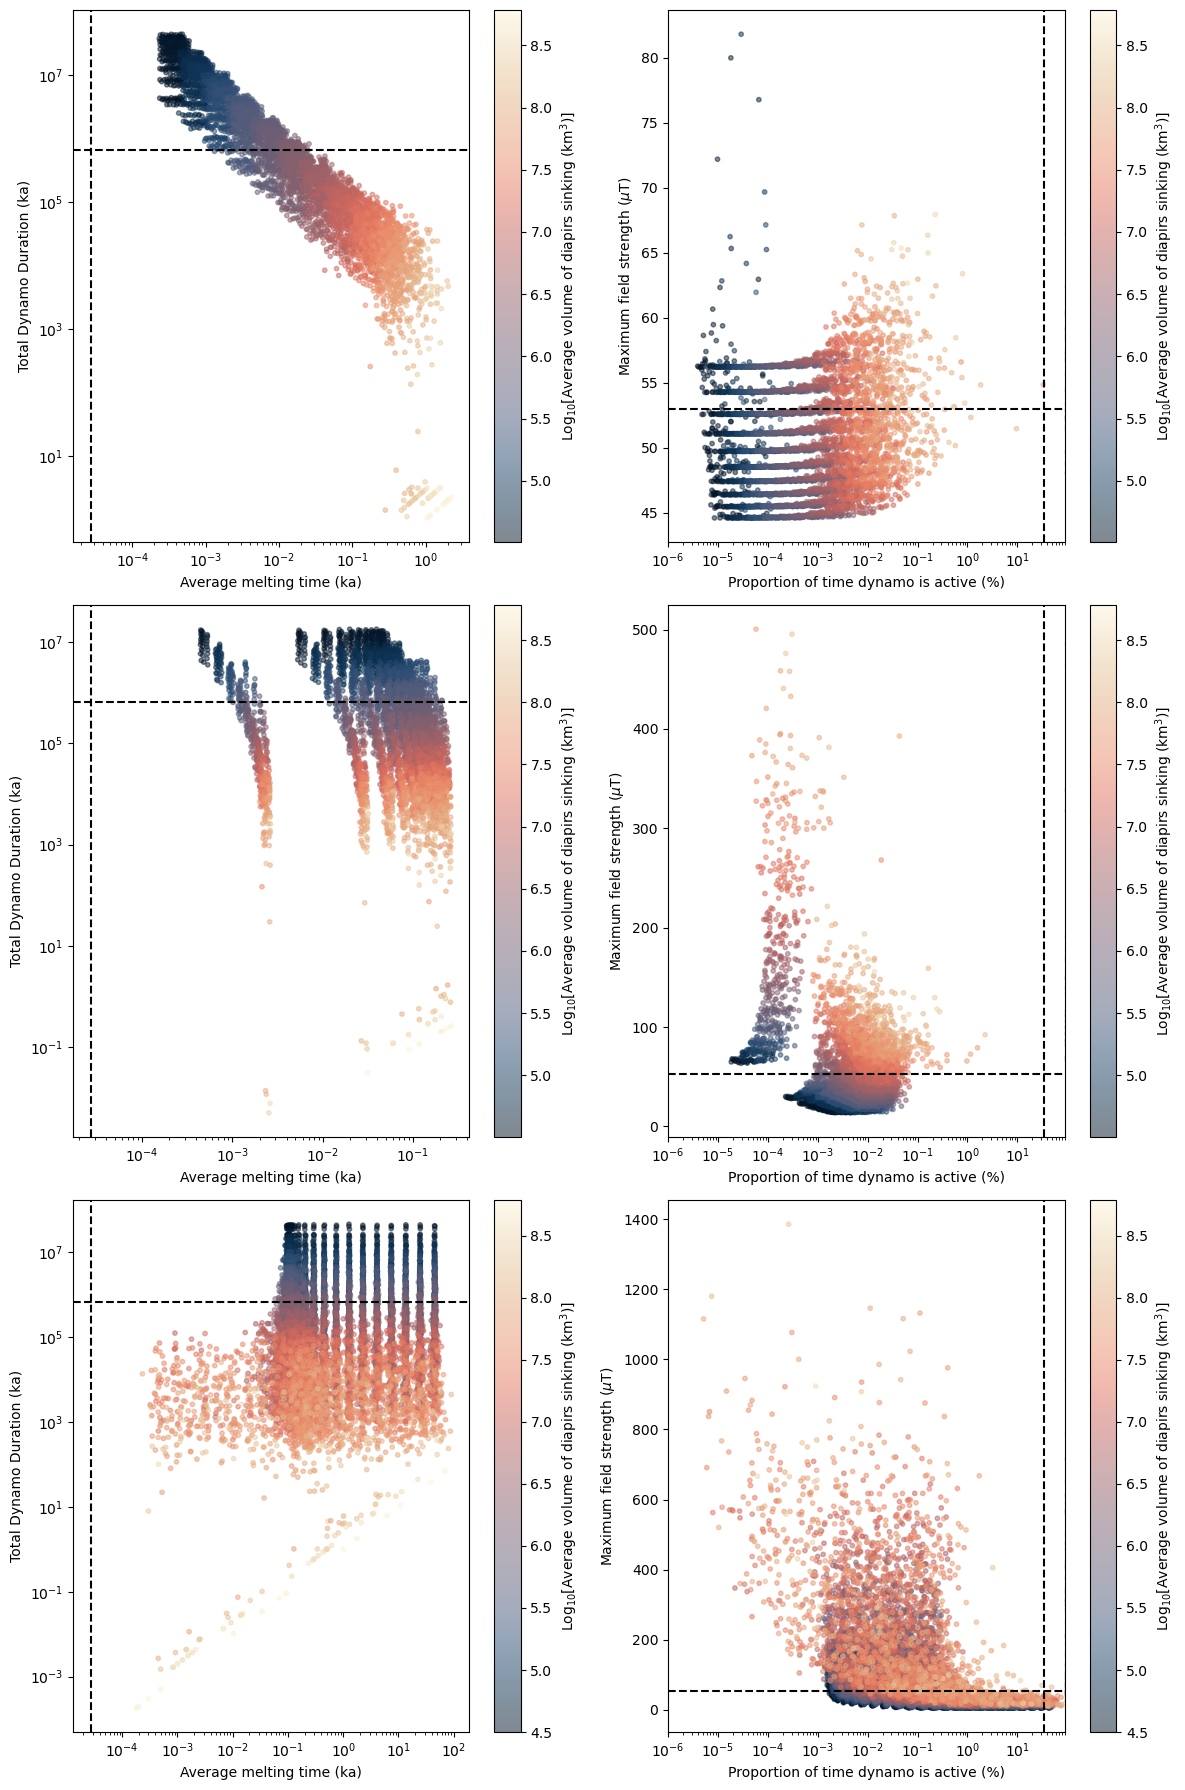

In [8]:
# Set the figsize to have a 1:1 aspect ratio for each plot
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

# Top Row: Height Properties
# Plot 1 (top-left)
scatter1 = axes[0, 0].scatter(height_prop['av_melt'], 
                              height_prop['total_on'], 
                              s=10, 
                              c=np.log10(height_prop['av_vol']), 
                              cmap=SCM8.lipari, 
                              alpha=0.5)
axes[0, 0].axhline(y=0.664e6, color='black', linestyle='--')
axes[0, 0].axvline(x=2.7e-5, color='black', linestyle='--')
axes[0, 0].set_xlabel('Average melting time (ka)')
axes[0, 0].set_ylabel('Total Dynamo Duration (ka)')
axes[0, 0].set_xscale('log')
axes[0, 0].set_yscale('log')

# Create a color bar for the first scatter plot
cbar1 = plt.colorbar(scatter1, ax=axes[0, 0])
cbar1.set_label('Log$_{10}$[Average volume of diapirs sinking (km$^3$)]')

# Plot 2 (top-right)
scatter2 = axes[0, 1].scatter(height_prop['percent_on'], 
                              height_prop['max_B'], 
                              s=10, 
                              c=np.log10(height_prop['av_vol']), 
                              cmap=SCM8.lipari, 
                              alpha=0.5)
axes[0, 1].axhline(y=53, color='black', linestyle='--')
axes[0, 1].axvline(x=35, color='black', linestyle='--')
axes[0, 1].set_xlabel('Proportion of time dynamo is active (%)')
axes[0, 1].set_ylabel('Maximum field strength ($\mu$T)')
axes[0, 1].set_xlim([1e-6, 90])
axes[0, 1].set_xscale('log')

# Create a color bar for the second scatter plot
cbar2 = plt.colorbar(scatter2, ax=axes[0, 1])
cbar2.set_label('Log$_{10}$[Average volume of diapirs sinking (km$^3$)]')

# Middle Row: Volume Properties (using same metrics as height_prop)
# Plot 3 (middle-left)
scatter3 = axes[1, 0].scatter(volume_prop['av_melt'], 
                              volume_prop['total_on'], 
                              s=10, 
                              c=np.log10(volume_prop['av_vol']), 
                              cmap=SCM8.lipari, 
                              alpha=0.5)
axes[1, 0].axhline(y=0.664e6, color='black', linestyle='--')
axes[1, 0].axvline(x=2.7e-5, color='black', linestyle='--')
axes[1, 0].set_xlabel('Average melting time (ka)')
axes[1, 0].set_ylabel('Total Dynamo Duration (ka)')
axes[1, 0].set_xscale('log')
axes[1, 0].set_yscale('log')

# Create a color bar for the third scatter plot
cbar3 = plt.colorbar(scatter3, ax=axes[1, 0])
cbar3.set_label('Log$_{10}$[Average volume of diapirs sinking (km$^3$)]')

# Plot 4 (middle-right)
scatter4 = axes[1, 1].scatter(volume_prop['percent_on'], 
                              volume_prop['max_B'], 
                              s=10, 
                              c=np.log10(volume_prop['av_vol']), 
                              cmap=SCM8.lipari, 
                              alpha=0.5)
axes[1, 1].axhline(y=53, color='black', linestyle='--')
axes[1, 1].axvline(x=35, color='black', linestyle='--')
axes[1, 1].set_xlabel('Proportion of time dynamo is active (%)')
axes[1, 1].set_ylabel('Maximum field strength ($\mu$T)')
axes[1, 1].set_xlim([1e-6, 90])
axes[1, 1].set_xscale('log')

# Create a color bar for the fourth scatter plot
cbar4 = plt.colorbar(scatter4, ax=axes[1, 1])
cbar4.set_label('Log$_{10}$[Average volume of diapirs sinking (km$^3$)]')

# Bottom Row: Independent Properties (using same metrics as height_prop)
# Plot 5 (bottom-left)
scatter5 = axes[2, 0].scatter(independent_prop['av_melt'], 
                              independent_prop['total_on'], 
                              s=10, 
                              c=np.log10(independent_prop['av_vol']), 
                              cmap=SCM8.lipari, 
                              alpha=0.5)
axes[2, 0].axhline(y=0.664e6, color='black', linestyle='--')
axes[2, 0].axvline(x=2.7e-5, color='black', linestyle='--')
axes[2, 0].set_xlabel('Average melting time (ka)')
axes[2, 0].set_ylabel('Total Dynamo Duration (ka)')
axes[2, 0].set_xscale('log')
axes[2, 0].set_yscale('log')

# Create a color bar for the fifth scatter plot
cbar5 = plt.colorbar(scatter5, ax=axes[2, 0])
cbar5.set_label('Log$_{10}$[Average volume of diapirs sinking (km$^3$)]')

# Plot 6 (bottom-right)
scatter6 = axes[2, 1].scatter(independent_prop['percent_on'], 
                              independent_prop['max_B'], 
                              s=10, 
                              c=np.log10(independent_prop['av_vol']), 
                              cmap=SCM8.lipari, 
                              alpha=0.5)
axes[2, 1].axhline(y=53, color='black', linestyle='--')
axes[2, 1].axvline(x=35, color='black', linestyle='--')
axes[2, 1].set_xlabel('Proportion of time dynamo is active (%)')
axes[2, 1].set_ylabel('Maximum field strength ($\mu$T)')
axes[2, 1].set_xlim([1e-6, 90])
axes[2, 1].set_xscale('log')

# Create a color bar for the sixth scatter plot
cbar6 = plt.colorbar(scatter6, ax=axes[2, 1])
cbar6.set_label('Log$_{10}$[Average volume of diapirs sinking (km$^3$)]')

plt.tight_layout()
plt.show()

Next, we will plot the correlation matrices for all input and output parameters for the three melting scenarios.

In [9]:
# Combine the DataFrames side by side
height_comb = pd.concat([height_prop, height_para], axis=1)
volume_comb = pd.concat([volume_prop, volume_para], axis=1)
independent_comb = pd.concat([independent_prop, independent_para], axis=1)

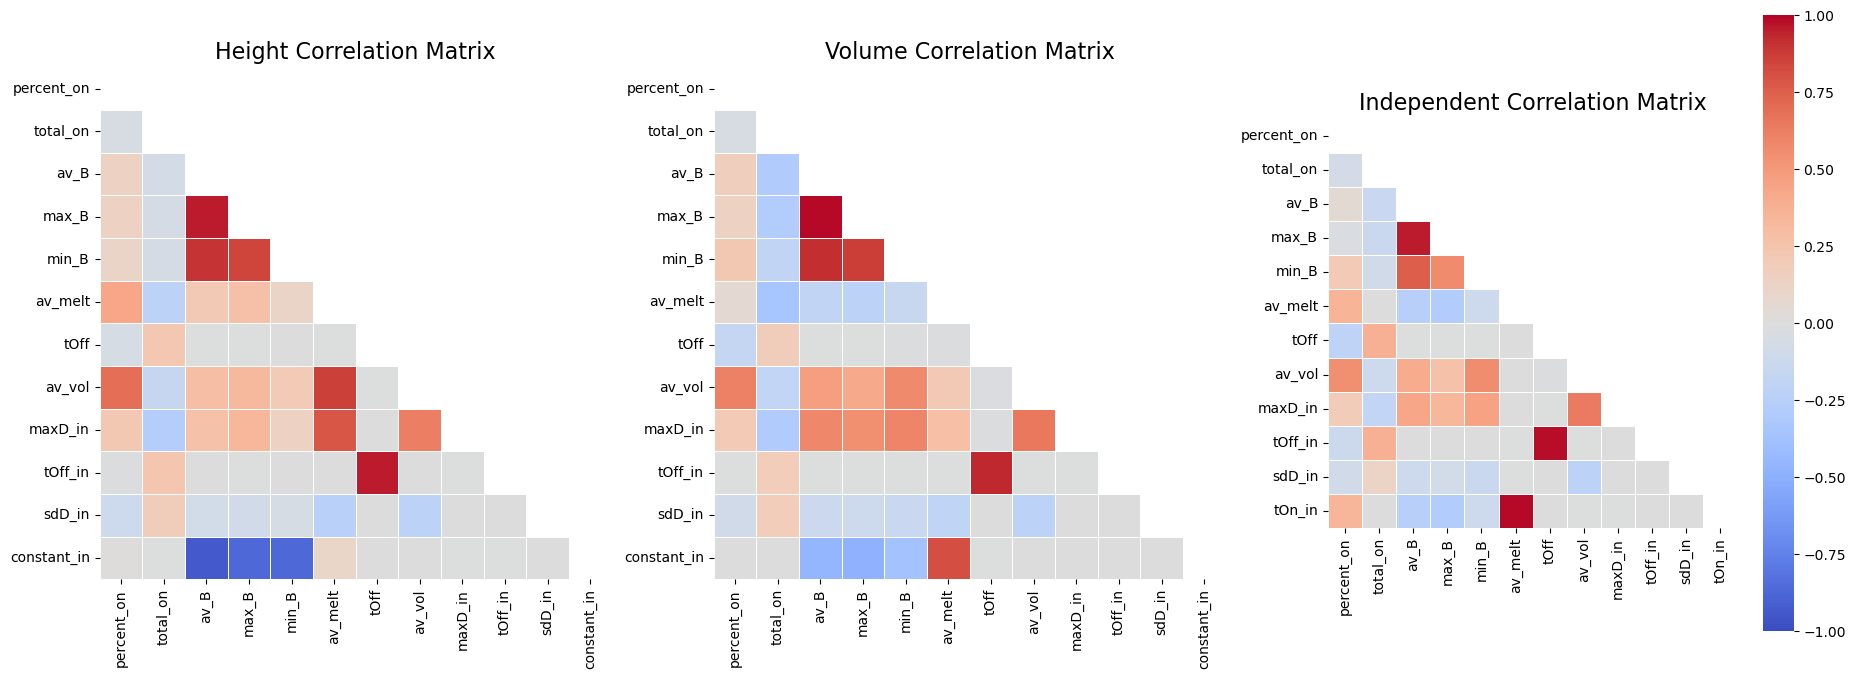

In [10]:
# Set up the matplotlib figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# List of the datasets
datasets = [height_comb, volume_comb, independent_comb]
titles = ['Height Correlation Matrix', 'Volume Correlation Matrix', 'Independent Correlation Matrix']

# Loop over the datasets and create a heatmap for each
for i, ax in enumerate(axes):
    # Calculate the correlation matrix
    corr_matrix = datasets[i].corr()
    
    # Generate a mask for the upper triangle (or lower triangle) of the matrix
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Draw the heatmap with the mask
    sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, annot=False, ax=ax, cbar=(i == 2))

    # Set the title for each subplot
    ax.set_title(titles[i], fontsize=16)

# Adjust the position of the last heatmap to align with the colorbar
fig.subplots_adjust(right=0.85)

# Display the plot
plt.show()

# Figure S6

Load the pre-calculated results for each melting scenario

In [11]:
# Load the data
#Melting Scenario 1
height_prop = pd.read_csv("Height_B_vs_time.csv")

#Melting Scenario 2
volume_prop = pd.read_csv("Volume_B_vs_time.csv")

#Melting Scenario 3
independent_prop = pd.read_csv("Independent_B_vs_time.csv")

If you want to run this yourself, use the following code.  This should only take a few minutes to run.

```
#set variables to first value of loop
Dmax = 10
Dsize = 1
tOff = 1000
method = 'height'
c = 0.005

#generate a dynamo history
dynamo = DynamoGenerate(Dmax,Dsize,tOff,method,#constant = c,#tOn = c) #choose either constant or ton depending on method

#set loop values for parameter sweep, select one from the three melting scenarios below
#For melting scenario 1
method = 'height'
maxD_values = [100000]  # Make this an iterable
tOff_values = [1000]  # Make this an iterable
constant_values = np.linspace(1e-3, 1, 10000)
sdD_values = [40]  # Make this an iterable

#For melting scenario 2
method = 'volume'
maxD_values = [100000]  # Make this an iterable
tOff_values = [1000]  # Make this an iterable
constant_values = np.linspace(1e-7,1e-3, 10000)
sdD_values = [40]  # Make this an iterable

#For melting scenario 3
method = 'independent'
maxD_values = [100000]  # Make this an iterable
tOff_values = [1000]  # Make this an iterable
tOn_values = np.logspace(-2, 1, 10000)
sdD_values = [40]  # Make this an iterable


B_vs_melt_prop = dynamo.loop_dynamo(
    method,
    maxD_values, 
    tOff_values, 
    sdD_values,
    constant_values=constant_values,
    save_output=True,
    outfile_name="B_vs_melt_prop.csv"
)
```

We can now create plots for maximum paleointensity as a function of melting time, to investigate how short melting episodes must be in order to exceed our criteria of 53 $\mu$T from the lunar paleomagnetic record.

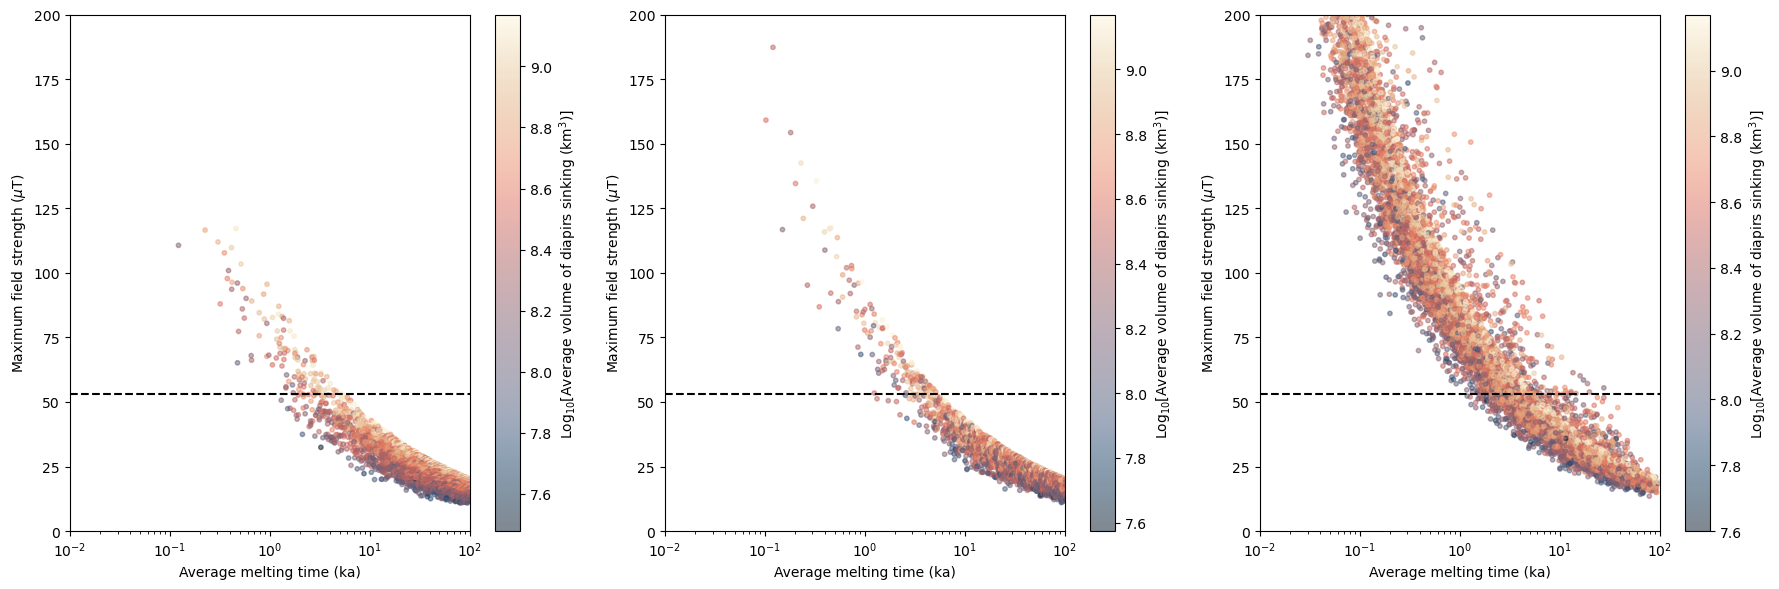

In [12]:
# Set the figsize to have a 1:1 aspect ratio for each plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Height Properties
# Plot 1 (left)
scatter1 = axes[0].scatter(height_prop['av_melt'], 
                           height_prop['max_B'], 
                           s=10, 
                           c=np.log10(height_prop['av_vol']), 
                           cmap=SCM8.lipari, 
                           alpha=0.5)
axes[0].axhline(y=53, color='black', linestyle='--')
axes[0].set_xlabel('Average melting time (ka)')
axes[0].set_ylabel('Maximum field strength ($\mu$T)')
axes[0].set_xscale('log')
axes[0].set_xlim([1e-2, 1e2])
axes[0].set_ylim([0,200])

# Create a color bar for the first scatter plot
cbar1 = plt.colorbar(scatter1, ax=axes[0])
cbar1.set_label('Log$_{10}$[Average volume of diapirs sinking (km$^3$)]')

# Volume Properties
# Plot 2 (middle)
scatter2 = axes[1].scatter(volume_prop['av_melt'], 
                           volume_prop['max_B'], 
                           s=10, 
                           c=np.log10(volume_prop['av_vol']), 
                           cmap=SCM8.lipari, 
                           alpha=0.5)
axes[1].axhline(y=53, color='black', linestyle='--')
axes[1].set_xlabel('Average melting time (ka)')
axes[1].set_ylabel('Maximum field strength ($\mu$T)')
axes[1].set_xscale('log')
axes[1].set_xlim([1e-2, 1e2])
axes[1].set_ylim([0,200])

# Create a color bar for the second scatter plot
cbar2 = plt.colorbar(scatter2, ax=axes[1])
cbar2.set_label('Log$_{10}$[Average volume of diapirs sinking (km$^3$)]')

# Independent properties 
# Plot 3 (right)
scatter3 = axes[2].scatter(independent_prop['av_melt'], 
                           independent_prop['max_B'], 
                           s=10, 
                           c=np.log10(independent_prop['av_vol']), 
                           cmap=SCM8.lipari, 
                           alpha=0.5)
axes[2].axhline(y=53, color='black', linestyle='--')
axes[2].set_xlabel('Average melting time (ka)')
axes[2].set_ylabel('Maximum field strength ($\mu$T)')
axes[2].set_xscale('log')
axes[2].set_xlim([1e-2, 1e2])
axes[2].set_ylim([0,200])

# Create a color bar for the third scatter plot
cbar3 = plt.colorbar(scatter3, ax=axes[2])
cbar3.set_label('Log$_{10}$[Average volume of diapirs sinking (km$^3$)]')

plt.tight_layout()
plt.show()


# Figure S7

First, we generate a dynamo that is active for between 0-100% of the time in increments of 1%.  Samples fall into 7 discrete time periods throughout the IHIE, and 3 of these time periods contain positive paleointensity results that are not within uncertainty of zero.  We calculate the probability of drawing at least 3 positive paleointensity results from the 7 time periods for each proportion of dynamo activity.  We then calculate the 99% and 95% confidence interval for the proportion of time a dynamo must be active in order to recover at least 3 positive paleointensities.

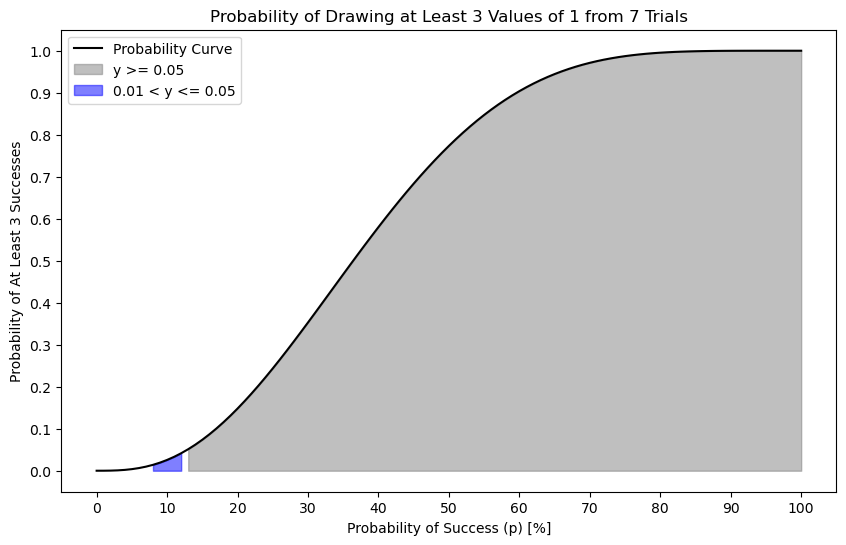

Intersection of y = 0.01 with Fit Line: x = 7.07


In [24]:
def calculate_probability(n, k, p):
    """
    Calculate the probability of getting at least k successes in n trials
    with success probability p using the binomial distribution.
    
    Parameters:
        n (int): Number of trials
        k (int): Number of successes
        p (float): Probability of success in each trial (0 <= p <= 1)
    
    Returns:
        float: Probability of getting at least k successes
    """
    # Calculate the cumulative probability of getting fewer than k successes
    p_less_than_k = binom.cdf(k - 1, n, p)
    
    # The probability of getting at least k successes is 1 minus the probability of getting fewer than k successes
    p_at_least_k = 1 - p_less_than_k
    
    return p_at_least_k

def main(n, k):
    # n = Number of trials
    # k = Number of successes required
    
    # Varying probability p from 0 to 100%
    p_values = np.linspace(0, 1, 101)  # 101 values from 0 to 1
    probabilities = [calculate_probability(n, k, p) for p in p_values]
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(p_values * 100, 
             probabilities, 
             linestyle='-', 
             color='black', 
             label='Probability Curve')
    
    # Shade where y > 0.05
    plt.fill_between(p_values * 100, 0, probabilities, 
                     
                     where=(np.array(probabilities) > 0.05), 
                     color='grey', alpha=0.5, 
                     label='y >= 0.05')
    
    # Shade where y > 0.01, but use a different color
    plt.fill_between(p_values * 100, 0, probabilities, 
                     where=(np.array(probabilities) > 0.01) & (np.array(probabilities) <= 0.05), 
                     color='blue', 
                     alpha=0.5, 
                     label='0.01 < y <= 0.05')
    
    plt.title(f'Probability of Drawing at Least {k} Values of 1 from {n} Trials')
    plt.xlabel('Probability of Success (p) [%]')
    plt.ylabel('Probability of At Least 3 Successes')
    plt.xticks(np.arange(0, 101, 10))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.legend()
    plt.savefig("at_least_3_probability.svg")
    plt.show()
    
    # Interpolation to find x-values where y = 0.01
    target_y = 0.01

    # Ensure the target_y is within the range of probabilities
    if target_y < min(probabilities) or target_y > max(probabilities):
        print(f'Target y-value {target_y} is out of range for interpolation.')
        return

    # Interpolating for the x-values where y = target_y
    x_cross_fit = np.interp(target_y, probabilities, p_values * 100)
    
    # Print the intersection point
    print(f'Intersection of y = {target_y} with Fit Line: x = {x_cross_fit:.2f}')
    
#run code for 3 positive paleointensities recovered from 7 discrete time periods
main(7,3)


# Figure S8

First, we need to load the results for the three melting scenarios

In [15]:
# Load the data
#Melting Scenario 1
height_prop = pd.read_csv("Height_loop_output.csv")

#Melting Scenario 2
volume_prop = pd.read_csv("Volume_loop_output.csv")

#Melting Scenario 3
independent_prop = pd.read_csv("Independent_loop_output.csv")

Next, we extract the relevant information (the proportion of time the dynamo was active for, the total duration of the intermittent dynamo and the maximum generated field strength) for each simulated dynamo history.

In [16]:
#proportion of time the dynamo was active
height_percent_on = height_prop['percent_on']
volume_percent_on = volume_prop['percent_on']
independent_percent_on = independent_prop['percent_on']

#total duration of the intermittent dynamo
height_total_on = height_prop['total_on']
volume_total_on = volume_prop['total_on']
independent_total_on = independent_prop['total_on']

#maximum field strength generated by the dynamo
height_max_B = height_prop['max_B']
volume_max_B = volume_prop['max_B']
independent_max_B = independent_prop['max_B']

Next, we calculate the probability of drawing 3 positive paleointensities from 7 discrete time periods for each simulated dynamo history for each of our melting scenarios. <br>

**Melting Scenario 1**

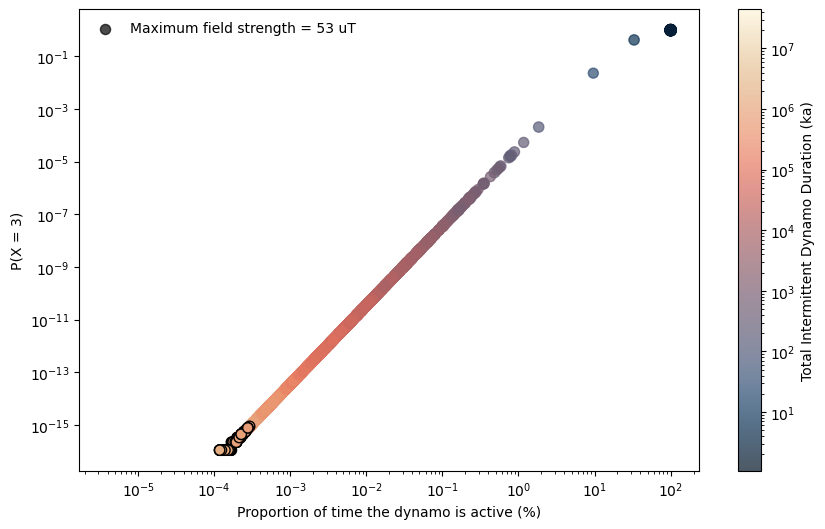

In [19]:
# Parameters
n = 7  # number of trials
k = 3  # number of successes

# Example data for color and size (ensure these are numpy arrays)
total_on = np.array(height_total_on)  # Convert to numpy array if not already
max_B = np.array(height_max_B)        # Convert to numpy array if not already

# Example probability values from 0% to 100%
p_values = np.array(height_percent_on) / 100

# Calculate probabilities for the filtered p_values
probabilities = np.array([calculate_probability(n, k, p) for p in p_values])

# Set up LogNorm for color mapping
norm_total_on = LogNorm(vmin=min(total_on[total_on > 0]), vmax=max(total_on))

# Define the criteria for bold points
mask_bold = (max_B > 53) & (total_on > 664e3)

# Ensure mask_bold is a boolean array with the same length
assert len(mask_bold) == len(p_values)

# Plot the results using scatter plot
plt.figure(figsize=(10, 6))

# Plot points that do not meet the criteria
scatter_normal = plt.scatter(p_values[~mask_bold] * 100, probabilities[~mask_bold], 
                             c=total_on[~mask_bold], 
                             cmap=SCM8.lipari,  # Colormap for the scatter plot
                             norm=norm_total_on,  # Apply logarithmic normalization for color
                             s=max_B[~mask_bold],  # Sizes of the points
                             alpha=0.7, 
                             label=None)

# Plot points that meet the criteria with different alpha
scatter_bold = plt.scatter(p_values[mask_bold] * 100, probabilities[mask_bold], 
                           c=total_on[mask_bold], 
                           cmap=SCM8.lipari,  # Colormap for the scatter plot
                           norm=norm_total_on,  # Apply logarithmic normalization for color
                           s=max_B[mask_bold],  # Sizes of the points
                           alpha=1, 
                           edgecolor='black',  # Optional: Add edge color for emphasis
                           label=None)

plt.xlabel('Proportion of time the dynamo is active (%)')
plt.ylabel(f'P(X = {k})')

# Set the y-axis to a logarithmic scale
plt.yscale('log')
plt.xscale('log')

# Add color bar for 'total_on'
cbar = plt.colorbar(scatter_normal, label='Total On')
cbar.set_label('Total Intermittent Dynamo Duration (ka)')

# Add custom legend for sizes
# Define specific sizes for the legend
legend_sizes = [53]  # Sizes corresponding to B_max = 10 and B_max = 100
legend_labels = [f'Maximum field strength = {size} uT' for size in legend_sizes]

# Create invisible scatter plots for the legend
for size, label in zip(legend_sizes, legend_labels):
    plt.scatter([], [], s=size, c='k', alpha=0.7, label=label)

# Add the legend
plt.legend(loc='best', frameon=False)

# Display the plot
plt.show()

**Melting Scenario 2**

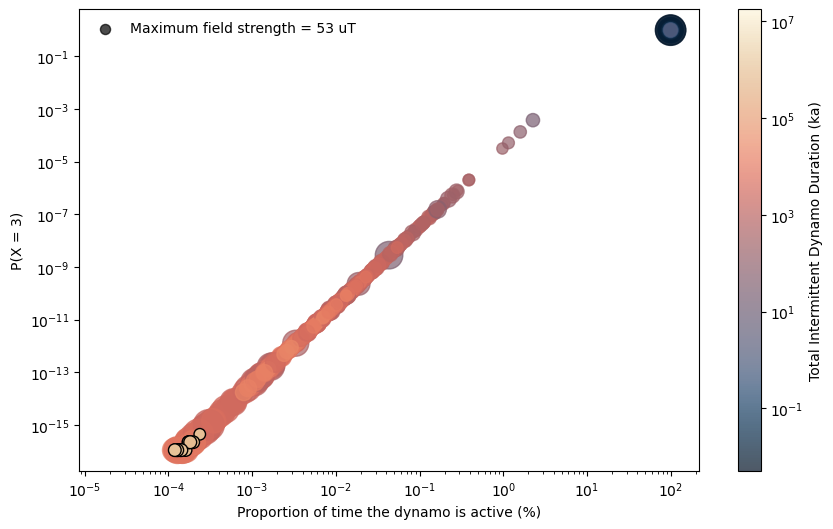

In [20]:
# Parameters
n = 7  # number of trials
k = 3  # number of successes

# Example data for color and size (ensure these are numpy arrays)
total_on = np.array(volume_total_on)  # Convert to numpy array if not already
max_B = np.array(volume_max_B)        # Convert to numpy array if not already

# Example probability values from 0% to 100%
p_values = np.array(volume_percent_on) / 100

# Calculate probabilities for the filtered p_values
probabilities = np.array([calculate_probability(n, k, p) for p in p_values])

# Set up LogNorm for color mapping
norm_total_on = LogNorm(vmin=min(total_on[total_on > 0]), vmax=max(total_on))

# Define the criteria for bold points
mask_bold = (max_B > 53) & (total_on > 664e3)

# Ensure mask_bold is a boolean array with the same length
assert len(mask_bold) == len(p_values)

# Plot the results using scatter plot
plt.figure(figsize=(10, 6))

# Plot points that do not meet the criteria
scatter_normal = plt.scatter(p_values[~mask_bold] * 100, probabilities[~mask_bold], 
                             c=total_on[~mask_bold], 
                             cmap=SCM8.lipari,  # Colormap for the scatter plot
                             norm=norm_total_on,  # Apply logarithmic normalization for color
                             s=max_B[~mask_bold],  # Sizes of the points
                             alpha=0.7, 
                             label=None)

# Plot points that meet the criteria with different alpha
scatter_bold = plt.scatter(p_values[mask_bold] * 100, probabilities[mask_bold], 
                           c=total_on[mask_bold], 
                           cmap=SCM8.lipari,  # Colormap for the scatter plot
                           norm=norm_total_on,  # Apply logarithmic normalization for color
                           s=max_B[mask_bold],  # Sizes of the points
                           alpha=1, 
                           edgecolor='black',  # Optional: Add edge color for emphasis
                           label=None)

plt.xlabel('Proportion of time the dynamo is active (%)')
plt.ylabel(f'P(X = {k})')

# Set the y-axis to a logarithmic scale
plt.yscale('log')
plt.xscale('log')

# Add color bar for 'total_on'
cbar = plt.colorbar(scatter_normal, label='Total On')
cbar.set_label('Total Intermittent Dynamo Duration (ka)')

# Add custom legend for sizes
# Define specific sizes for the legend
legend_sizes = [53]  # Sizes corresponding to B_max = 10 and B_max = 100
legend_labels = [f'Maximum field strength = {size} uT' for size in legend_sizes]

# Create invisible scatter plots for the legend
for size, label in zip(legend_sizes, legend_labels):
    plt.scatter([], [], s=size, c='k', alpha=0.7, label=label)

# Add the legend
plt.legend(loc='best', frameon=False)

# Display the plot
plt.show()

**Melting Scenario 3**

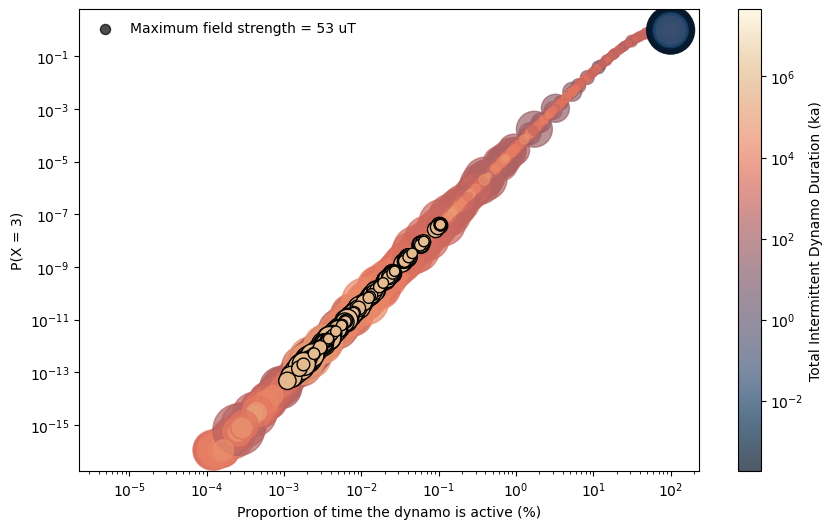

In [21]:
# Parameters
n = 7  # number of trials
k = 3  # number of successes

# Example data for color and size (ensure these are numpy arrays)
total_on = np.array(independent_total_on)  # Convert to numpy array if not already
max_B = np.array(independent_max_B)        # Convert to numpy array if not already

# Example probability values from 0% to 100%
p_values = np.array(independent_percent_on) / 100

# Calculate probabilities for the filtered p_values
probabilities = np.array([calculate_probability(n, k, p) for p in p_values])

# Set up LogNorm for color mapping
norm_total_on = LogNorm(vmin=min(total_on[total_on > 0]), vmax=max(total_on))

# Define the criteria for bold points
mask_bold = (max_B > 53) & (total_on > 664e3)

# Ensure mask_bold is a boolean array with the same length
assert len(mask_bold) == len(p_values)

# Plot the results using scatter plot
plt.figure(figsize=(10, 6))

# Plot points that do not meet the criteria
scatter_normal = plt.scatter(p_values[~mask_bold] * 100, probabilities[~mask_bold], 
                             c=total_on[~mask_bold], 
                             cmap=SCM8.lipari,  # Colormap for the scatter plot
                             norm=norm_total_on,  # Apply logarithmic normalization for color
                             s=max_B[~mask_bold],  # Sizes of the points
                             alpha=0.7, 
                             label=None)

# Plot points that meet the criteria with different alpha
scatter_bold = plt.scatter(p_values[mask_bold] * 100, probabilities[mask_bold], 
                           c=total_on[mask_bold], 
                           cmap=SCM8.lipari,  # Colormap for the scatter plot
                           norm=norm_total_on,  # Apply logarithmic normalization for color
                           s=max_B[mask_bold],  # Sizes of the points
                           alpha=1, 
                           edgecolor='black',  # Optional: Add edge color for emphasis
                           label=None)

plt.xlabel('Proportion of time the dynamo is active (%)')
plt.ylabel(f'P(X = {k})')

# Set the y-axis to a logarithmic scale
plt.yscale('log')
plt.xscale('log')

# Add color bar for 'total_on'
cbar = plt.colorbar(scatter_normal, label='Total On')
cbar.set_label('Total Intermittent Dynamo Duration (ka)')

# Add custom legend for sizes
# Define specific sizes for the legend
legend_sizes = [53]  # Sizes corresponding to B_max = 10 and B_max = 100
legend_labels = [f'Maximum field strength = {size} uT' for size in legend_sizes]

# Create invisible scatter plots for the legend
for size, label in zip(legend_sizes, legend_labels):
    plt.scatter([], [], s=size, c='k', alpha=0.7, label=label)

# Add the legend
plt.legend(loc='best', frameon=False)

# Display the plot
plt.show()
